In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
Path='/content/gdrive/MyDrive/kaggle'

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
song_df_1 = pd.read_csv(Path+'/kaggle_visible_evaluation_triplets.txt',sep='\t',header=None)
song_df_1.columns = ['user_id', 'song_id', 'freq']


In [23]:
song_df_1

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [24]:
song_df_2=pd.read_csv(Path+"/unique_tracks.txt",sep='<SEP>',
                   names=["track_id","song_id","artist","release"])
song_df_2.drop_duplicates(['song_id'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [25]:
song_df_2.head()

,track_id,song_id,artist,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [26]:
songs_df = pd.merge(song_df_1, song_df_2, on="song_id", how="left")

In [27]:
songs_df.head()

,user_id,song_id,freq,track_id,artist,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [28]:
songs_df.to_csv('songs.csv', index=False)

In [29]:

df_songs = pd.read_csv('songs.csv')

In [30]:
df_songs.head()

,user_id,song_id,freq,track_id,artist,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [31]:
print(f"There are {df_songs.shape[0]} observations in the dataset")

There are 1450933 observations in the dataset


# **Basic Statistics and Observations:**

In [38]:
print('Total data points :', df_songs.shape[0])
print('Total number of users :', df_songs['user_id'].unique().shape[0])
print('Total number of songs :', df_songs['song_id'].unique().shape[0])
print('Total number of tracks :', df_songs['track_id'].unique().shape[0])
print('Number of Unique Release :', df_songs['release'].unique().shape[0])
print('Number of Unique artists :', df_songs['artist'].unique().shape[0])

Total data points : 1450933
Total number of users : 110000
Total number of songs : 163206
Total number of tracks : 163206
Number of Unique Release : 137623
Number of Unique artists : 28361


In [32]:
df_songs.isnull().sum()

user_id     0
song_id     0
freq        0
track_id    0
artist      0
release     1
dtype: int64

In [55]:
df_songs.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [56]:
df_songs.describe(include='object')

,user_id,song_id,track_id,artist,release
count,1450933,1450933,1450933,1450933,1450932
unique,110000,163206,163206,28361,137622
top,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOFRQTD12A81C233C0,TRDMBIJ128F4290431,Coldplay,Sehr kosmisch
freq,53,5043,5043,12279,5043


## **Distribution of frequency**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


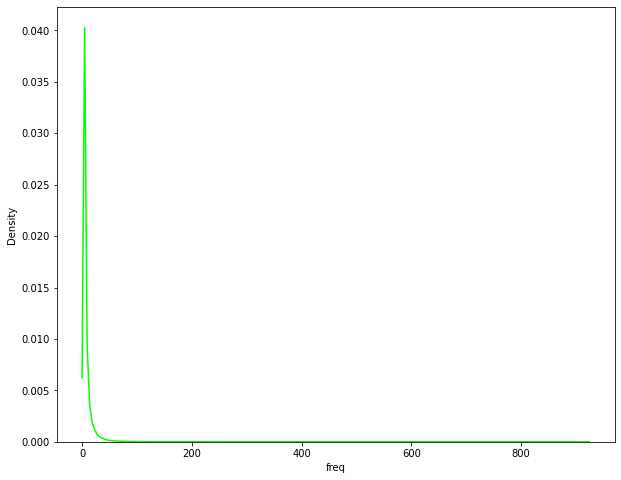

In [58]:
plt.figure(figsize=(10,8))
sns.distplot(df_songs['freq'],hist=False,color='lime')
plt.show()


# Most popular artist 

In [33]:
most_popular_songs = songs_df.groupby('artist')['freq'].count().reset_index().sort_values(['freq', 'artist'], ascending = [0,1])
most_popular_songs['popularity %']  = round(most_popular_songs['freq'].div(most_popular_songs['freq'].sum())*100, 2)
# now we will print out the top 15 most popular songs
most_popular_songs = most_popular_songs[:15]
most_popular_songs

,artist,freq,popularity %
5085,Coldplay,12279,0.85
13610,Kings Of Leon,8514,0.59
8801,Florence + The Machine,8213,0.57
12964,Justin Bieber,7669,0.53
11378,Jack Johnson,6784,0.47
26441,Train,6617,0.46
23946,The Black Keys,6507,0.45
7969,Eminem,6297,0.43
18346,OneRepublic,6027,0.42
17317,Muse,5849,0.40


In [34]:
artist_song = most_popular_songs['artist'].tolist()
listen_count_songs = most_popular_songs['freq'].tolist()

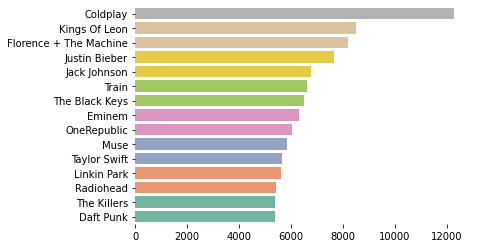

In [35]:
plt.figure()
sns.barplot(x=listen_count_songs, y=artist_song, palette='Set2_r')
sns.despine(left=True, bottom=True)

Popular Albums

In [51]:
most_popular_album  = songs_df.groupby(['release'])['freq'].count().reset_index().sort_values(['freq', 'release'], 
                                                                                                ascending = [0,1])
most_popular_album = most_popular_album[:15]
most_popular_album

,release,freq
98812,Sehr kosmisch,5043
125393,Undo,4483
136066,You're The One,4270
28716,Dog Days Are Over (Radio Edit),3780
93984,Revelry,3672
98585,Secrets,3456
49061,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272
47683,Hey_ Soul Sister,2791
37656,Fireflies,2745
121358,Tive Sim,2669


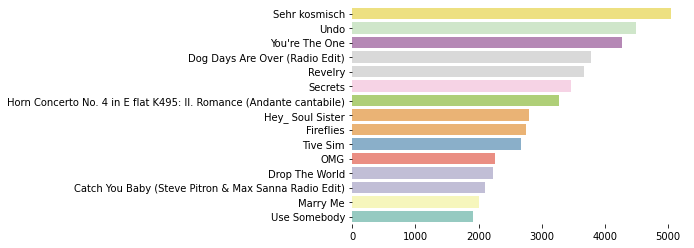

In [52]:
album = most_popular_album['release'].tolist()
listen_count_songs_2 = most_popular_album['freq'].tolist()
sns.barplot(x=listen_count_songs_2, y=album, palette='Set3_r')
sns.despine(left=True, bottom=True)
plt.show()

Most popular Users

In [53]:
most_popular_users  = songs_df.groupby(['user_id'])['freq'].count().reset_index().sort_values(['freq', 'user_id'], 
                                                                                                ascending = [0,1])
most_popular_users = most_popular_users[:15]
most_popular_users

,user_id,freq
53921,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
1597,03ad93fdb01506ce205f4708decf8e4b1ae90fff,52
6694,0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90,52
19962,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
90678,d30e18323f15426c3cdc8585252ed34459916f51,52
21323,316110734d8da7478cc33237458814f770a9eb7a,51
54171,7e27789eae69bc946c51833c0b833a49c58ed9ed,51
64941,9769ebffc543fa42b58daf6f52f8816abf5f408e,51
65684,992fea335363e87217e1b052fd7380b3fd7e35b4,51


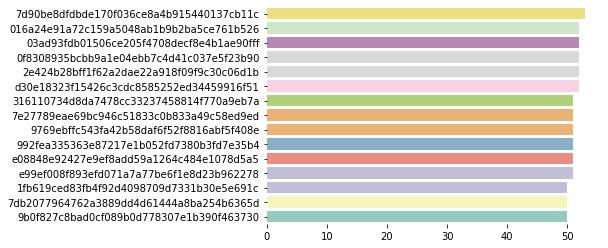

In [54]:
users = most_popular_users['user_id'].tolist()
listen_count_songs_4 = most_popular_users['freq'].tolist()
sns.barplot(x=listen_count_songs_4, y=users, palette='Set3_r')
sns.despine(left=True, bottom=True)
plt.show()

What was the maximum time the same user listen to a same song?

In [40]:
listen_counts = pd.DataFrame(df_songs.groupby('freq').size(), columns=['count'])
print(f"The maximum time the same user listened to the same songs was: {listen_counts.reset_index(drop=False)['freq'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 923



How many times on average the same user listen to a same song?

In [42]:
print(f"On average, a user listen to the same song {df_songs['freq'].mean()} times")

On average, a user listen to the same song 3.1871492343202616 times


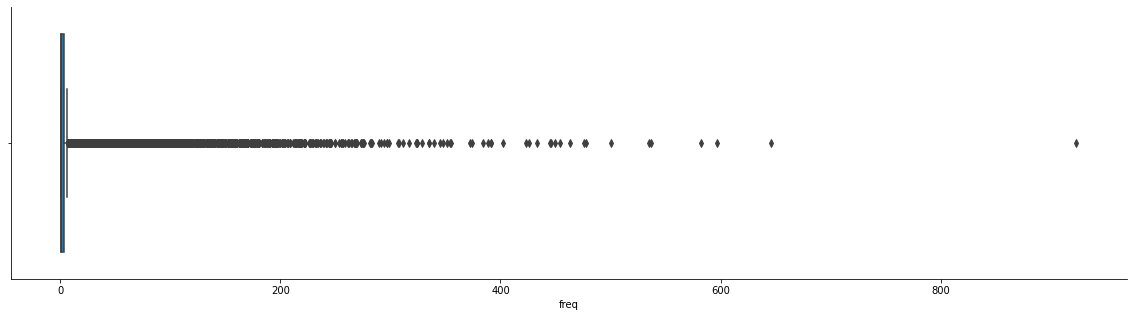

In [43]:
# distribution of freq
plt.figure(figsize=(20, 5))
sns.boxplot(x='freq', data=df_songs)
sns.despine()



What are the most frequent number of times a user listen to the same song?

In [44]:
listen_counts_temp = listen_counts[listen_counts['count'] > 50].reset_index(drop=False)


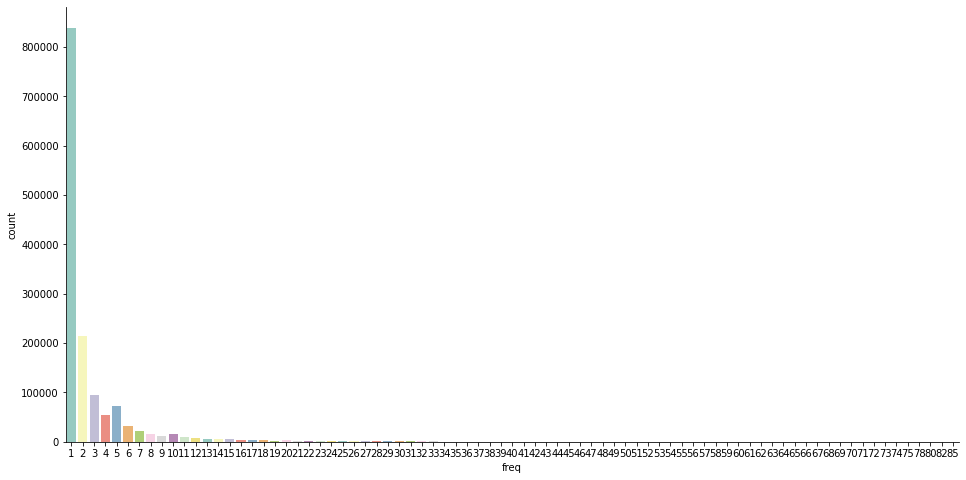

In [46]:
#No. of times user listen to a same song
plt.figure(figsize=(16, 8))
sns.barplot(x='freq', y='count', palette='Set3', data=listen_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

How many songs does a user listen in average?

In [47]:

song_user = df_songs.groupby('user_id')['song_id'].count()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


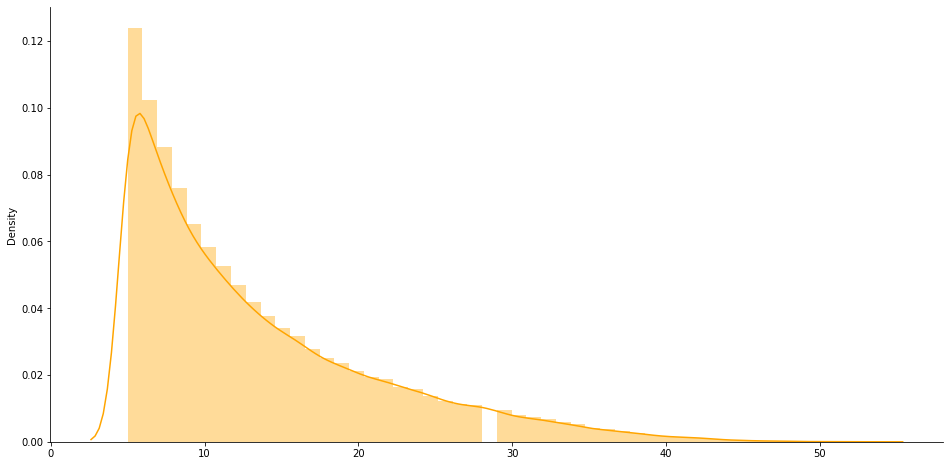

In [48]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [49]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 13.1903 songs


In [50]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 11.0 songs, with minimum 5 and maximum 53 songs


# Popularity of artist as per frequency

In [62]:
artist_popularity=df_songs.groupby(["artist"]).agg({"freq":"count"}).reset_index()

In [63]:
# SORTING THE ARTIST NAME BASED ON POPULARITY AND WHO IS HAVING HIGHEST FREQUENCY:

artist_popularity.sort_values(by="freq",ascending=False).head()

,artist,freq
5085,Coldplay,12279
13610,Kings Of Leon,8514
8801,Florence + The Machine,8213
12964,Justin Bieber,7669
11378,Jack Johnson,6784


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


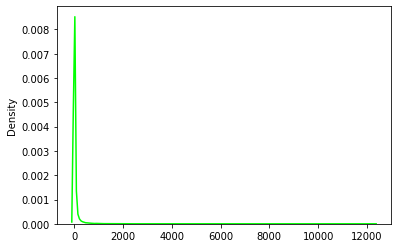

In [64]:
sns.distplot(artist_popularity["freq"].values,x=None,hist=False,color="lime")
plt.show()

In [66]:
df_songs["release"][df_songs["artist"]=="Coldplay"].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [74]:
coldplay_songs = ['Yellow', 'The Scientist', 'Fix You',
       'Clocks', 'Speed Of Sound']
unique_users_count = []

for i in coldplay_songs:
    #print(i)
    unique_users_count.append(sum(songs_df['release'] == i))

In [75]:
unique_users_count

[1332, 1679, 1034, 1505, 502]

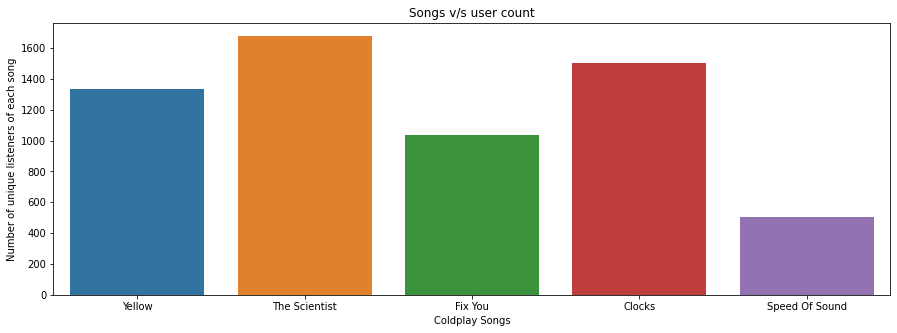

In [77]:
plt.figure(figsize=(15,5))
y = unique_users_count
x = coldplay_songs
plt.xlabel("Coldplay Songs")
plt.ylabel("Number of unique listeners of each song")

plt.title("Songs v/s user count")

sns.barplot(x = x,y = y);

from above graph we observe that **The Scientist** song is most listened and **Speed of sound** song is least listened by the user